In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm


2023-06-05 10:05:41.669367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL


In [3]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q","R", "S", "T", "V", "W", "Y", "-"]

# integer encode
label_encoder = LabelEncoder()
y_encoder =LabelEncoder()
y_encoder = y_encoder.fit(df['Amino Acids'].unique())
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = label_encoder.fit_transform(aa)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
one_hot_status = True
col_one_hot = []
col_integer = []
y_labels = []
for k in tqdm(df.index):
    integer_encoded = label_encoder.transform(list(df.loc[k,"CDR3_al"]))
    col_integer.append(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    if one_hot_status:
        onehot_encoded = onehot_encoder.transform(integer_encoded)
        col_one_hot.append(onehot_encoded)
    y_label = y_encoder.transform([df.loc[k,"Amino Acids"]])
    y_labels.append(y_label)
    

  0%|          | 0/236345 [00:00<?, ?it/s]

In [5]:
# Save encoders
import pickle
with open('./encoders/integer_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

with open('./encoders/y_encoder.pkl', 'wb') as f:
    pickle.dump(y_encoder, f)

with open('./encoders/onehot_encoder.pkl', 'wb') as f:
    pickle.dump(onehot_encoder, f)

In [6]:
y_labels = [int(y) for y in y_labels]
if one_hot_status:
    df["CDR3_al_one_hot"] = col_one_hot
df["CDR3_al_integer"] = col_integer
df["label"] = y_labels

In [14]:
df_save = df.drop_duplicates(subset=['CDR3_al'])
df_save = df_save.sample(n=1000, random_state=42)
df_save.to_csv('./models/cdr3_seqs.csv', index=False)

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [8]:
df['CDR3_al_one_hot'][0].shape

(20, 21)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
values = np.stack(df["CDR3_al_integer"].to_numpy())
X_train = tf.constant(values)
n_inputs = 20
print(len(X_train))
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=16, verbose=1)

2023-06-05 10:07:05.527473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


236345
Epoch 1/20
14772/14772 [==============================] - 14s 933us/step - loss: 12.4375
Epoch 2/20
14772/14772 [==============================] - 13s 881us/step - loss: 10.1067
Epoch 3/20
14772/14772 [==============================] - 14s 925us/step - loss: 9.5855
Epoch 4/20
14772/14772 [==============================] - 13s 890us/step - loss: 9.0416
Epoch 5/20
14772/14772 [==============================] - 13s 885us/step - loss: 8.6091
Epoch 6/20
14772/14772 [==============================] - 13s 885us/step - loss: 8.2966
Epoch 7/20
14772/14772 [==============================] - 13s 882us/step - loss: 8.1271
Epoch 8/20
14772/14772 [==============================] - 15s 1ms/step - loss: 8.0123
Epoch 9/20
14772/14772 [==============================] - 13s 886us/step - loss: 7.9268
Epoch 10/20
14772/14772 [==============================] - 13s 887us/step - loss: 7.8791
Epoch 11/20
14772/14772 [==============================] - 13s 893us/step - loss: 7.8224
Epoch 12/20
14772/14772

In [8]:
# Save the model 
model.save('./models/simple_ae.h5')

In [9]:
# load 
model = tf.keras.models.load_model('./models/simple_ae.h5')

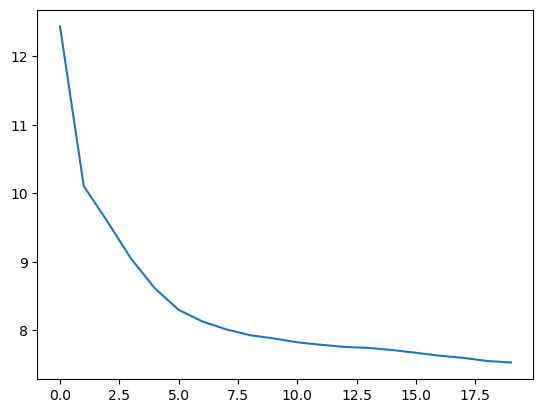

In [11]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')

In [12]:
import pickle as pkl
pkl.dump(history.history['loss'], open("loss_ae_simple.pkl", "wb"))

In [13]:
encoder = Model(inputs=visible, outputs=bottleneck)

In [35]:
# save the encoder to file
encoder.save('./models/simple_ae_encoder.h5')

In [14]:
X_test

<tf.Tensor: shape=(200, 20), dtype=int64, numpy=
array([[ 2,  1, 16, ..., 14,  5,  5],
       [ 2,  1, 16, ..., 14, 20,  5],
       [ 2,  1,  8, ..., 14,  5,  5],
       ...,
       [ 2,  1, 16, ..., 14, 20,  5],
       [ 2,  1, 16, ..., 14, 20,  5],
       [ 2,  1, 16, ..., 14, 20,  5]])>

(200, 20)
7/7 [==============================] - 0s 765us/step


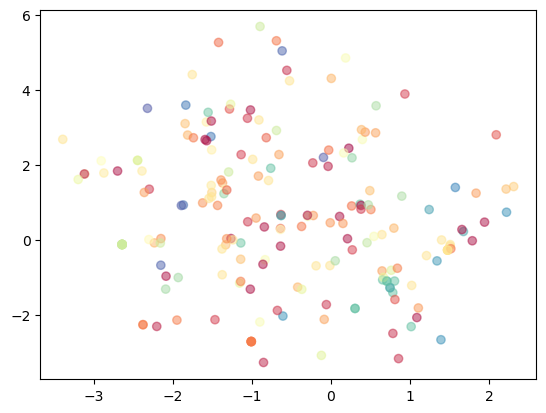

In [13]:
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["label"].nunique())
df["label_color"] = df["label"].apply(lambda x: rgb_values[x])
N = 200
X_test = X_train[:N]
print(X_test.shape)
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['label_color'][:N], alpha=0.5)
plt.show()

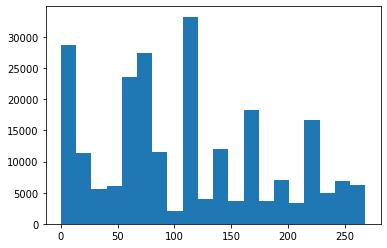

In [12]:
plt.hist(df["label"], bins=20)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

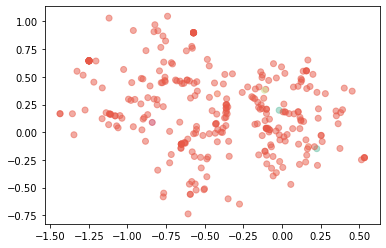

In [13]:
df["begin_seq_label"] = df["CDR3_al"].apply(lambda x: x[:3])
begin_labels = []
begin_encoder = LabelEncoder()
begin_encoder = begin_encoder.fit(df['begin_seq_label'].unique())
for k in tqdm(df.index):
    begin_label = begin_encoder.transform([df.loc[k,"begin_seq_label"]])
    begin_labels.append(begin_label)
begin_labels = [int(y) for y in begin_labels]
df["begin_seq_label"] = begin_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["begin_seq_label"].nunique())
df["begin_seq_color"] = df["begin_seq_label"].apply(lambda x: rgb_values[x])
N = 300
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['begin_seq_color'][:N], alpha=0.5)
plt.show()

In [14]:
df["begin_seq_label"].value_counts()

15    218148
16      6631
81      5181
64      2016
7       1670
       ...  
41         1
40         1
39         1
38         1
50         1
Name: begin_seq_label, Length: 101, dtype: int64

  0%|          | 0/236345 [00:00<?, ?it/s]

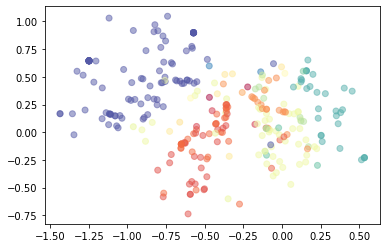

In [98]:
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[15:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])
N = 300
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['end_seq_color'][:N], alpha=0.5)
plt.show()

<ipython-input-99-ff7ab4d99018>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


Accuracy:  0.58


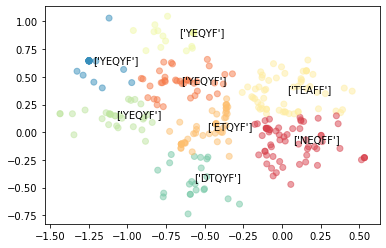

In [99]:
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=col_kmeans, alpha=0.5)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], end_encoder.inverse_transform([label_dict[cluster]]), fontsize=10)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

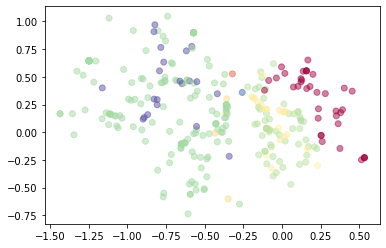

In [67]:
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[17:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])
N = 300
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['end_seq_color'][:N], alpha=0.5)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], end_encoder.inverse_transform([label_dict[cluster]]), fontsize=10)
plt.show()

Accuracy:  0.715


<ipython-input-97-803a8677f74e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


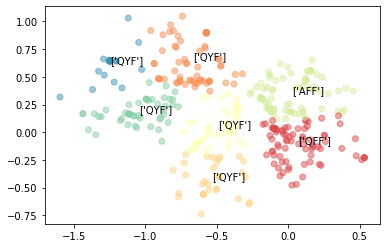

In [97]:
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=col_kmeans, alpha=0.5)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], end_encoder.inverse_transform([label_dict[cluster]]), fontsize=10)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

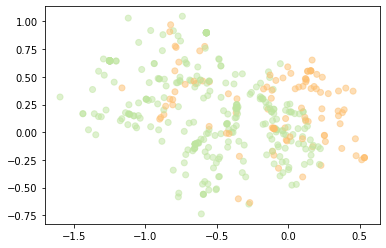

In [71]:
df["j_label"] = df["j_gene"].apply(lambda x: x.split("-")[0])
j_labels = []
j_encoder = LabelEncoder()
j_encoder = j_encoder.fit(df['j_label'].unique())
for k in tqdm(df.index):
    j_label = j_encoder.transform([df.loc[k,"j_label"]])
    j_labels.append(j_label)
j_labels = [int(y) for y in j_labels]
df["j_label"] = j_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["j_label"].nunique())
df["j_color"] = df["j_label"].apply(lambda x: rgb_values[x])
N = 400
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['j_color'][:N], alpha=0.5)
plt.show()

Accuracy:  0.7375


<ipython-input-96-349de3abe37e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['j_kmeans_label'] = kmeans.labels_


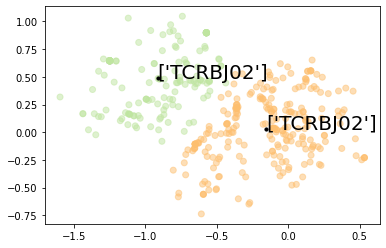

In [96]:
from sklearn.cluster import KMeans
k = 2 # 8 is highest accuracy
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['j_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['j_kmeans_label'] == cluster]['j_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['j_kmeans_label'], sample['j_label'])])/len(sample))
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=col_kmeans, alpha=0.5)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], j_encoder.inverse_transform([label_dict[cluster]]), fontsize=20)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

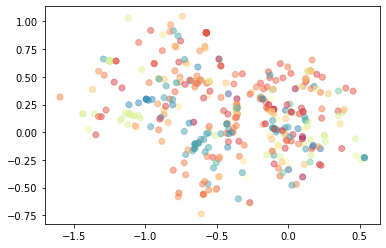

In [18]:
df["v_label"] = df["v_gene"].apply(lambda x: x.split("-")[0])
v_labels = []
v_encoder = LabelEncoder()
v_encoder = v_encoder.fit(df['v_label'].unique())
for k in tqdm(df.index):
    v_label = v_encoder.transform([df.loc[k,"v_label"]])
    v_labels.append(v_label)
v_labels = [int(y) for y in v_labels]
df["v_label"] = v_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["v_label"].nunique())
df["v_color"] = df["v_label"].apply(lambda x: rgb_values[x])
N = 400
X_test = X_train[:N]
X_test_encode = encoder.predict(X_test[:N])
plt.scatter(X_test_encode[:,0], X_test_encode[:,1], color=df['v_color'][:N], alpha=0.5)
plt.show()